Keep Python runtime and install java

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [245]:
%load /content/drive/MyDrive/colab/init_script.ipynb

#Linear functions
We will be using the term *linear equation* to mean a weighted sum of inputs plus an offset. If there is just one input $x$, then this is a straight line:

\begin{equation}y=\beta+\omega x,\end{equation}

where $\beta$ is the y-intercept of the linear and $\omega$ is the slope of the line. When there are two inputs $x_{1}$ and $x_{2}$, then this becomes:

\begin{equation}y=\beta+\omega_1 x_1 + \omega_2 x_2.\end{equation}

Any other functions are by definition **non-linear**.




## 1D Linear function

* Define an array of x values from 0 to 10 with increments of 0.01
* Compute y using the function: \begin{equation}y=\beta+\omega x\end{equation}
* Plot the function
* Experiment with changing the values of $\beta$ and  $\omega$
* Make a line that crosses the y-axis at 10 and the x-axis at 5

In [ ]:
NDManager manager = NDManager.newBaseManager()

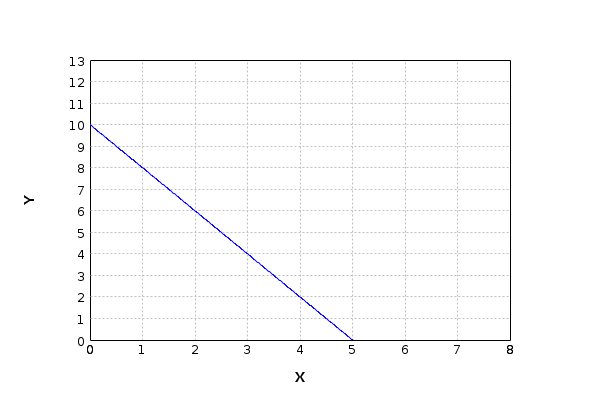

In [148]:
var beta = 10f;
var omega = -2f;
var x = manager.arange(0f, 10f, 0.01f, DataType.FLOAT64);
var y = x.mul(omega).add(beta);
var data = toDoubleArray(x.stack(y, 1));
var canvas = LinePlot.of(data, Color.BLUE).canvas();
canvas.setBound(new double[]{0, 0}, new double[]{8, 13});
canvas.toBufferedImage(600, 400);

## 2D linear function

* Define 2 arrays $x_1$ and $x_2$ with values from 0 to 10 with increments of 0.1
* Define a linear function with two inputs, $x_1$ and $x_2$ \begin{equation}y=\beta+\omega_1 x_1 + \omega_2 x_2\end{equation}
* Plot the 2D function
* Predict what this plot will look like if you set $\omega_1 = 0$
* Predict what this plot will look like if you set $\omega_2 = 0$
* Predict what this plot will look like if you set $\beta = -5$

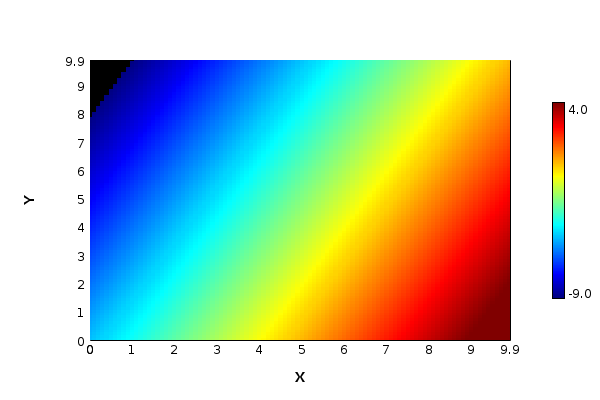

In [182]:
var beta = -5f;
var omega1 = 1f;
var omega2 = -0.5f;
var x1 = manager.arange(0f, 10f, 0.1f, DataType.FLOAT64);
var x2 = manager.arange(0f, 10f, 0.1f, DataType.FLOAT64);
var gridMap = meshgrid(x1, x2);
x1_mesh = gridMap.get("x1");
x2_mesh = gridMap.get("x2");
var z = x1_mesh.mul(omega1).add(x2_mesh.mul(omega2)).add(beta);
var canvas = Heatmap.of(x1.toDoubleArray(), x2.toDoubleArray(), toDoubleArray(z), 256).canvas();
canvas.toBufferedImage(600, 400);

Often we will want to compute many linear functions at the same time.  For example, we might have three inputs, $x_1$, $x_2$, and $x_3$ and want to compute two linear functions giving $y_1$ and $y_2$. Of course, we could do this by just running each equation separately,<br><br>

\begin{align}y_1 &=& \beta_1 + \omega_{11} x_1 + \omega_{12} x_2 + \omega_{13} x_3\\
y_2 &=& \beta_2 + \omega_{21} x_1 + \omega_{22} x_2 + \omega_{23} x_3
\end{align}

However, we can write it more compactly with vectors and matrices:

\begin{equation}
\begin{bmatrix} y_1\\ y_2 \end{bmatrix} = \begin{bmatrix}\beta_{1}\\\beta_{2}\end{bmatrix}+ \begin{bmatrix}\omega_{11}&\omega_{12}&\omega_{13}\\\omega_{21}&\omega_{22}&\omega_{23}\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix}
\end{equation}
or

\begin{equation}
\mathbf{y} = \boldsymbol\beta +\boldsymbol\Omega\mathbf{x}
\end{equation}

for short.  Here, lowercase bold symbols are used for vectors.  Upper case bold symbols are used for matrices.



## 3D Linear function

In [267]:
var beta_vec = manager.create(new float[]{0.5f, 0.2f});
var omega_mat = manager.create(new float[][]{{-1f, 0.4f, -0.3f}, {0.1f, 0.1f, 1.2f}});
var x_vec = manager.create(new float[]{4f, -1f, 2f});
var y_vec = beta_vec.add(omega_mat.matMul(x_vec));
y_vec

ND: (2) cpu() float32
[-4.5,  2.9]


# Questions

1.  A single linear equation with three inputs (i.e. **linear_function_3D()**) associates a value y with each point in a 3D space ($x_1$,$x_2$,$x_3$).  Is it possible to visualize this?   What value is at position (0,0,0)?

2.  Write code to compute three linear equations with two inputs ($x_1$, $x_2$) using both the individual equations and the matrix form (you can make up any values for the inputs $\beta_{i}$ and the slopes $\omega_{ij}$.

In [269]:
x_vec = manager.zeros(new Shape(3));
y_vec = beta_vec.add(omega_mat.matMul(x_vec));
y_vec

ND: (2) cpu() float32
[0.5, 0.2]


In [272]:
var beta_vec = manager.create(new float[]{0.5f, 0.2f, -1f});
var omega_mat = manager.create(new float[][]{{-1f, 0.4f}, {0.1f, 0.1f}, {-0.1f, 1f}});
var x_vec = manager.create(new float[]{4f, -1f});
var y_vec = beta_vec.add(omega_mat.matMul(x_vec));
y_vec

ND: (3) cpu() float32
[-3.9,  0.5, -2.4]


# Special functions

Throughout the book, we'll be using some special functions (see Appendix B.1.3).  The most important of these are the logarithm and exponential functions.  Let's investigate their properties.

We'll start with the exponential function $y=\exp[x]=e^x$ which maps the real line $[-\infty,+\infty]$ to non-negative numbers $[0,+\infty]$.

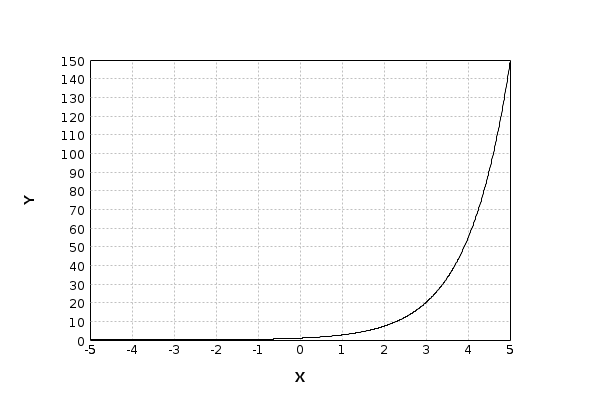

In [289]:
var x = manager.arange(-5f, 5f, 0.01f, DataType.FLOAT64);
var y = x.exp();
LinePlot.of(toDoubleArray(x.stack(y, 1))).canvas().toBufferedImage(600, 400);

# Questions

1. What is $e^0$?  
2. What is $e^1$?
3. What is $e^{-\infty}$?
4. What is $e^{+\infty}$?
5. A function is convex if we can draw a straight line between any two points on the function, and the line lies above the function everywhere between these two points. Similarly, a function is concave if a straight line between any two points lies below the function everywhere between these two points.  Is the exponential function convex or concave or neither?


In [303]:
System.out.print(manager.create(new float[]{0f}).exp());
System.out.print(manager.create(new float[]{1f}).exp());
System.out.print(manager.create(new float[]{Float.NEGATIVE_INFINITY}).exp());
System.out.print(manager.create(new float[]{Float.POSITIVE_INFINITY}).exp());

ND: (1) cpu() float32
[1.]
ND: (1) cpu() float32
[2.7183]
ND: (1) cpu() float32
[0.]
ND: (1) cpu() float32
[inf]


Yes, the function $e^x$ is convex. Let's verify this using the second derivative test:

### 1. **First Derivative:**
The first derivative of $f(x) = e^x$ is:

$f'(x) = \frac{d}{dx} e^x = e^x$

### 2. **Second Derivative:**
The second derivative of $f(x) = e^x$ is:

$f''(x) = \frac{d}{dx} e^x = e^x$

### 3. **Convexity Condition:**
A function $f(x)$ is convex if its second derivative $f''(x)$ is non-negative for all $x$. Since $e^x > 0$ for all $x$, the second derivative $f''(x) = e^x$ is always positive.

### Conclusion:
Since the second derivative of $e^x$ is always positive, $e^x$ is a strictly convex function.

# Questions

1. What is $log[0]$?  
2. What is $log[1]$?
3. What is $log[e]$?
4. What is $log[e^3]$?
5. What is $e^{log[4]}$?
6. What is $log[-1]$?
7. Is the logarithm function concave or convex?


In [351]:
System.out.print(manager.create(new float[]{0f}).log());
System.out.print(manager.create(new float[]{1f}).log());
System.out.print(manager.create(new double[]{Math.E}).log());
System.out.print(manager.create(new float[]{3f}).exp().log());
System.out.print(manager.create(new float[]{4f}).log().exp());
System.out.print(manager.create(new float[]{-1f}).log());

ND: (1) cpu() float32
[-inf]
ND: (1) cpu() float32
[0.]
ND: (1) cpu() float64
[1.]
ND: (1) cpu() float32
[3.]
ND: (1) cpu() float32
[4.]
ND: (1) cpu() float32
[nan]


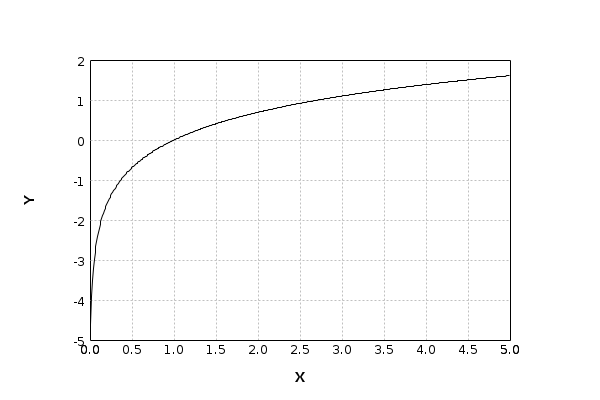

In [323]:
var x = manager.arange(0.01f, 5f, 0.01f, DataType.FLOAT64);
var y = x.log();
LinePlot.of(toDoubleArray(x.stack(y, 1))).canvas().toBufferedImage(600, 400);

Yes, the function $log(x)$ is **concave** and not convex.

To determine whether a function is convex or concave, you can examine its second derivative:

1. The first derivative of $log(x)$ with respect to $x$ is:
   $\frac{d}{dx} log(x) = \frac{1}{x}$

2. The second derivative is: $\frac{d^2}{dx^2} \log(x) = -\frac{1}{x^2}$

Since the second derivative, $-\frac{1}{x^2}$, is always negative for $x > 0$, $log(x)$ is a concave function on its domain $x > 0$.

A function is convex if its second derivative is non-negative $\geq 0$ for all $x$ in its domain. Since $log(x)$ has a negative second derivative, it is concave, not convex.